In [7]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

In [8]:
def one_hot_encoding(input_matrix):
    numclass=np.max(input_matrix,axis=0)
    matrix=np.zeros((len(input_matrix),int(np.sum(numclass))))
    for idx_row,row in enumerate(input_matrix):
        for idx_column,value in enumerate(row):
            matrix[idx_row,int(np.sum(numclass[:idx_column]))+int(value)-1]=1
    return matrix

# Monk 3

In [9]:
data_monk=np.loadtxt("../../data/MONK/monks-3.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]
input_data=one_hot_encoding(input_data)

data_monk_val=np.loadtxt("../../data/MONK/monks-3.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]
val_data=one_hot_encoding(val_data)

In [10]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [11]:
learning_rate=0.9
lamb=0.
N_epoch=1500
alpha=0.8
nesterov=False
batch_size=-1
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1500:  [train MEE = 0.0949]  [val MEE = 0.0956]                              
Elapsed time: 1.5493183135986328 s


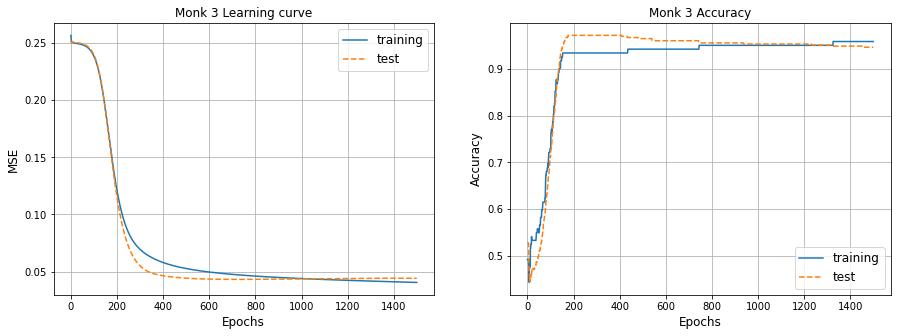

In [12]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 3 Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 3 Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()

In [14]:
accuracy_val=[]
accuracy_tr=[]
mse_tr=[]
mse_val=[]
lamb=0
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy_val.append(netw.val_accuracy[-1])
        accuracy_tr.append(netw.train_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy_val[-1])
        print("mean_std: ",np.mean(accuracy_val), " ", np.std(accuracy_val),"\n")
print(f"Accuracy_val: {np.mean(accuracy_val)} +- {np.std(accuracy_val)}\n Accuracy_tr: {np.mean(accuracy_tr)} +- {np.std(accuracy_tr)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Try:  0
Epoch 1500:  [train MEE = 0.0868]  [val MEE = 0.0908]                              
Elapsed time: 0.5010213851928711 s
Accuracy:  0.9398148148148148
mean_std:  0.9398148148148148   0.0 

Try:  1
Epoch 1500:  [train MEE = 0.0840]  [val MEE = 0.0883]                              
Elapsed time: 0.4914982318878174 s
Accuracy:  0.9398148148148148
mean_std:  0.9398148148148148   0.0 

Try:  2
Epoch 1500:  [train MEE = 0.0832]  [val MEE = 0.0874]                              
Elapsed time: 0.4846482276916504 s
Accuracy:  0.9398148148148148
mean_std:  0.9398148148148148   0.0 

Try:  3
Epoch 1500:  [train MEE = 0.0942]  [val MEE = 0.0960]                              
Elapsed time: 0.4952726364135742 s
Accuracy:  0.9444444444444444
mean_std:  0.9409722222222221   0.0020046884346862095 

Try:  4
Epoch 1500:  [train MEE = 0.0862]  [val MEE = 0.0898]                              
Elapsed time: 0.47411251068115234 s
Accuracy:  0.9421296296296297
mean_std:  0.9412037037037037   0.0018518518

# Monk 3 with regularization

In [15]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [16]:

lamb=0.001
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1500:  [train MEE = 0.1876]  [val MEE = 0.1773]                              
Elapsed time: 1.5886058807373047 s


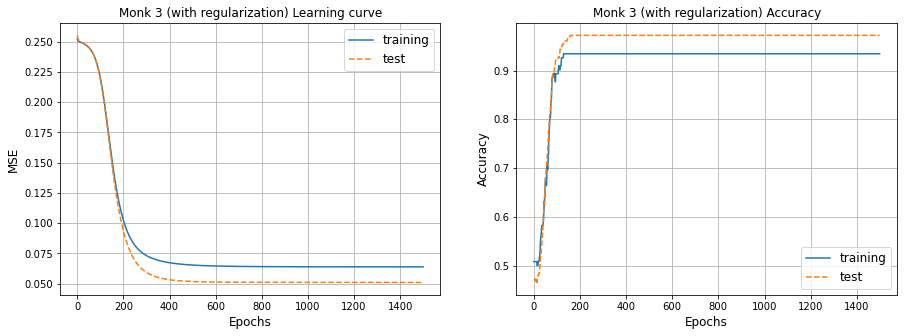

In [17]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 3 (with regularization) Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 3 (with regularization) Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()

In [20]:
accuracy_val=[]
accuracy_tr=[]
mse_tr=[]
mse_val=[]
lamb=0.001
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy_val.append(netw.val_accuracy[-1])
        accuracy_tr.append(netw.train_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy_val[-1])
        print("mean_std: ",np.mean(accuracy_val), " ", np.std(accuracy_val),"\n")
print(f"Accuracy_val: {np.mean(accuracy_val)} +- {np.std(accuracy_val)}\n Accuracy_tr: {np.mean(accuracy_tr)} +- {np.std(accuracy_tr)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Try:  0
Epoch 1500:  [train MEE = 0.1967]  [val MEE = 0.1869]                              
Elapsed time: 0.5332980155944824 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  1
Epoch 1500:  [train MEE = 0.1889]  [val MEE = 0.1786]                              
Elapsed time: 0.4878513813018799 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  2
Epoch 1500:  [train MEE = 0.1942]  [val MEE = 0.1843]                              
Elapsed time: 0.5140509605407715 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  3
Epoch 1500:  [train MEE = 0.1901]  [val MEE = 0.1799]                              
Elapsed time: 0.49890851974487305 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  4
Epoch 1500:  [train MEE = 0.1891]  [val MEE = 0.1788]                              
Elapsed time: 0.5005459785461426 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222221   1.1102230246251565e-16 

Try: 